In [101]:
import torch
import pandas as pd
from transformers import BertModel, BertTokenizer
from tqdm import tqdm
%pip install git+https://github.com/huggingface/accelerate

In [82]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from transformers import AutoModelForSequenceClassification
from transformers import Trainer
from datasets import load_metric

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [84]:
df = pd.read_csv("clean.csv")
df.rename(columns={"text_clean": "text", "polarity": "label"}, inplace=True)
df.replace("", float("NaN"), inplace=True)
df.dropna(inplace=True)

df = df[['text', 'label']]
df.sample(5)

,text,label
1055,aamiin brother kuliah onlen ada laptop dipinje...,positive
377,serasa aniversarry dewan wakil rakyat kuliah o...,positive
974,mutualan kuliah onlen bahas teori perilaku kon...,positive
5891,ctrl ctrl kuliah onlen jadi,neutral
3864,beli kuota huhu pusing banget kuota boros gara...,negative


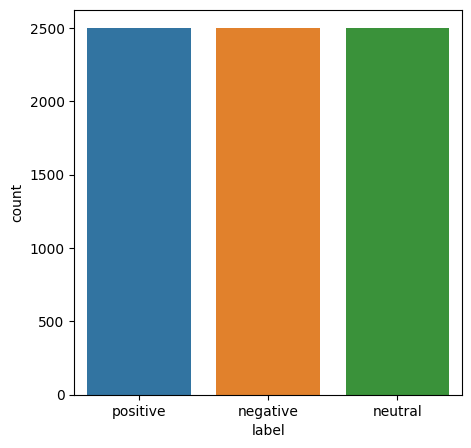

In [85]:
plt.figure(figsize=(5, 5))
sns.countplot(x=df['label'])
plt.show()

In [86]:
df["label"] = df["label"].map({"negative": 0, "neutral": 1, "positive": 2})

In [87]:
RANDOM_SEED = 42

df_train, df_test = train_test_split(
    df,
    test_size=0.2,
    random_state=RANDOM_SEED,
)

df_val, df_test = train_test_split(
    df_test,
    test_size=0.1,
    random_state=RANDOM_SEED,
)

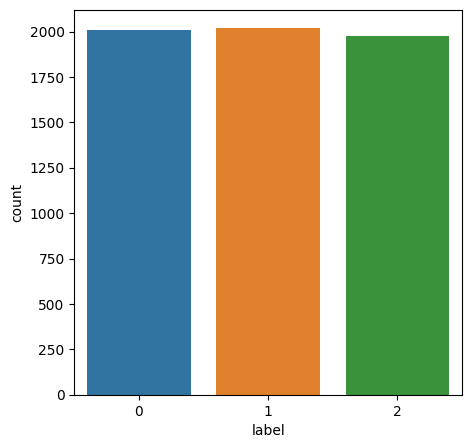

In [88]:
plt.figure(figsize=(5, 5))
sns.countplot(x=df_train['label'])
plt.show()

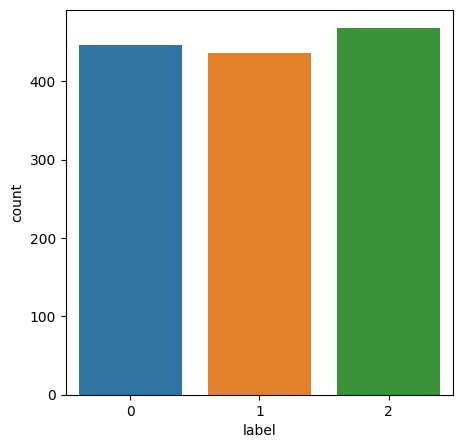

In [89]:
plt.figure(figsize=(5, 5))
sns.countplot(x=df_val['label'])
plt.show()

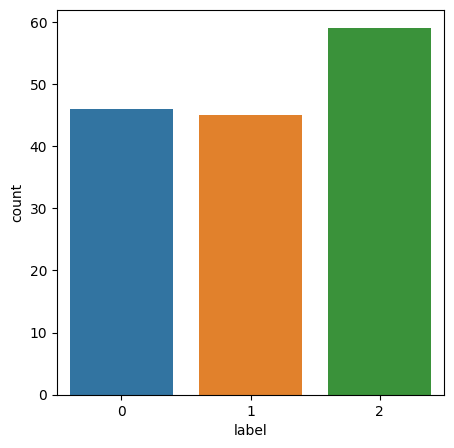

In [90]:
plt.figure(figsize=(5, 5))
sns.countplot(x=df_test['label'])
plt.show()

In [91]:
print(f'Total Train: {len(df_train)}')
print(f'Total Val  : {len(df_val)}')
print(f'Total Test : {len(df_test)}')

Total Train: 6000
Total Val  : 1350
Total Test : 150


In [92]:
actual_label = df_test['label']

In [93]:
df_train.to_csv("train.csv", index=False)
df_val.to_csv("eval.csv", index=False)
df_test.to_csv("test.csv", index=False)

In [94]:
from datasets import load_dataset

files = {
    "train": "train.csv", 
    "eval": "eval.csv", 
    "test": "test.csv",
}

dataset = load_dataset('csv', data_files=files)

Extracting data files: 100%|██████████| 3/3 [00:00<00:00, 134.08it/s]


Dataset csv downloaded and prepared to C:/Users/labib/.cache/huggingface/datasets/csv/default-e8fdd96cb331c57b/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1. Subsequent calls will reuse this data.


100%|██████████| 3/3 [00:00<00:00, 111.13it/s]


In [95]:
model_name = 'indolem/indobert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)

In [96]:
def tokenize_function(text):
    return tokenizer(text["text"], padding='max_length', max_length=256)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

In [97]:
train_dataset = tokenized_datasets["train"]
eval_dataset = tokenized_datasets["eval"]

In [98]:
import torch
torch.cuda.empty_cache()

device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cuda:0'

In [99]:
model = BertModel.from_pretrained(model_name, num_labels=3)

Some weights of the model checkpoint at indolem/indobert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [100]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    "test_trainer", 
    per_device_train_batch_size=4,
)

NameError: name 'PartialState' is not defined